In [1]:
# Q2 - MDS cities
import pandas as pd

In [2]:
df = pd.read_excel('distance.xlsx')

In [3]:
df

,Unnamed: 0,Jammu,delhi,Kashmir,agra,kanpur,Allahabad,Mumbai
0,Jammu,0,505,202,686,864,1051,1541
1,delhi,505,0,588,181,383,577,1163
2,kashmir,202,588,0,761,896,1068,1699
3,agra,686,181,761,0,233,423,1055
4,kanpur,864,383,896,233,0,194,1133
5,allahabad,1051,577,1068,423,194,0,1173
6,mumbai,1541,1163,1699,1055,1133,1173,0


In [5]:
df.set_index('Unnamed: 0', inplace=True)
D_matrix = df.values
print(D_matrix)

[[   0  505  202  686  864 1051 1541]
 [ 505    0  588  181  383  577 1163]
 [ 202  588    0  761  896 1068 1699]
 [ 686  181  761    0  233  423 1055]
 [ 864  383  896  233    0  194 1133]
 [1051  577 1068  423  194    0 1173]
 [1541 1163 1699 1055 1133 1173    0]]


In [ ]:
# B) local code of MDS
import numpy as np
import matplotlib.pyplot as plt

def classical_mds(distances_matrix, num_dimensions):
    n = len(distances_matrix)

    # create Householder centering matrix
    H = np.eye(n) - np.ones((n, n)) / n
    B = -0.5 * H @ distances_matrix**2 @ H

    # eigenvalue find
    eigenvalues, eigenvectors = np.linalg.eigh(B)

    # Sort eigenvalues
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # top eigenvectors upto the given dimensions
    selected_eigenvectors = eigenvectors[:, :num_dimensions]

    # Map data in space of given dimensions
    coordinates = np.sqrt(np.diag(eigenvalues[:num_dimensions])) @ selected_eigenvectors.T

    return coordinates, eigenvalues


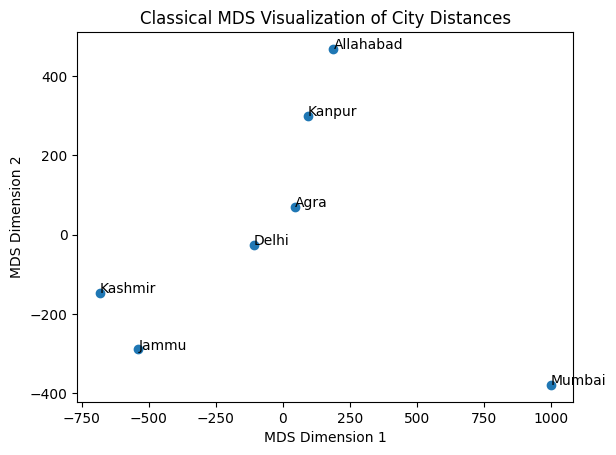

In [11]:
# Perform Classical MDS to reduce to 2D
coordinates, eigenvalues = classical_mds(D_matrix, 2)

# Plot the cities in 2D
plt.scatter(coordinates[0], coordinates[1])
for i, city in enumerate(["Jammu", "Delhi", "Kashmir", "Agra", "Kanpur", "Allahabad", "Mumbai"]):
    plt.annotate(city, (coordinates[0, i], coordinates[1, i]))

plt.title("Classical MDS Visualization of City Distances")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.show()

In [12]:
eigenvalues

array([ 1.81486553e+06,  5.64723323e+05,  2.40193560e+02,  1.05526434e+02,
       -6.64303599e-11, -1.17086338e+02, -4.52631645e+02])

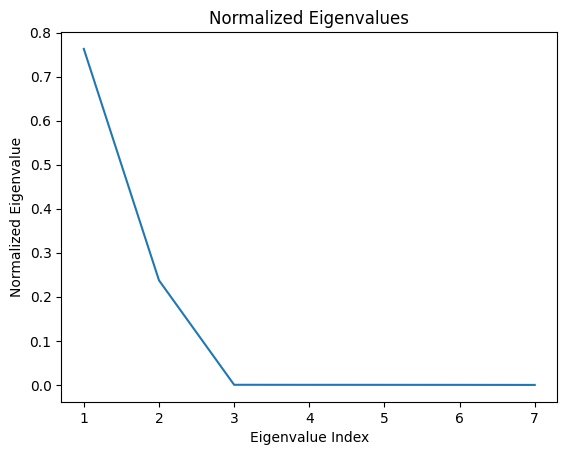

In [19]:
# c) plot eigenvalues
normalized_eigenvalues = eigenvalues / np.sum(eigenvalues)

# Plot the normalized eigenvalues
plt.plot(range(1, len(normalized_eigenvalues) + 1), normalized_eigenvalues)
plt.title("Normalized Eigenvalues")
plt.xlabel("Eigenvalue Index")
plt.ylabel("Normalized Eigenvalue")
plt.show()

In [ ]:
There are some negative eigenvalues which shows that D_matrix is not a positive semi-definite matrix

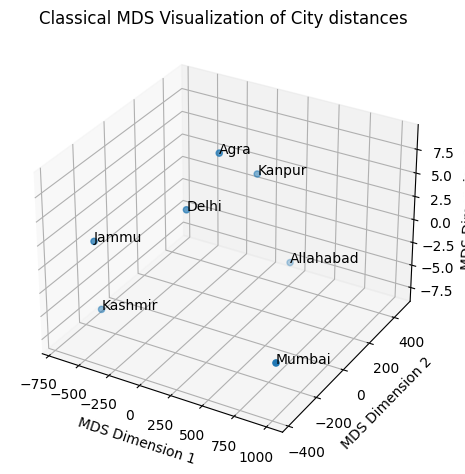

In [21]:
# d) scatter plot of 3 eigen vectors
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting tools

num_dimensions = 3

coordinates, eigenvalues = classical_mds(D_matrix, num_dimensions)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(coordinates[0], coordinates[1], coordinates[2])
for i, city in enumerate(["Jammu", "Delhi", "Kashmir", "Agra", "Kanpur", "Allahabad", "Mumbai"]):
   ax.text(coordinates[0, i], coordinates[1, i], coordinates[2, i], city)

ax.set_title("Classical MDS Visualization of City distances")
ax.set_xlabel("MDS Dimension 1")
ax.set_ylabel("MDS Dimension 2")
ax.set_zlabel("MDS Dimension 3")
plt.tight_layout()
plt.show()


In [17]:
coordinates


array([[-538.2975014 , -107.7592322 , -682.98702346,   45.93533678,
          93.39190769,  189.59709861, 1000.11941399],
       [-289.17025498,  -25.3603316 , -146.99747161,   71.14570763,
         300.40744179,  468.95584873, -378.98093997],
       [   2.05225821,    3.59062404,   -7.82242259,    8.86346371,
           4.0506644 ,   -7.52534419,   -3.20924358]])

In [ ]:
We can observe the distance in 3 coordinate system of eigen values. The relative distance is preserved in a local coordinate system.